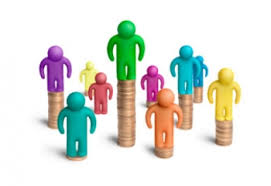

# **Problem Statement**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#supress warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import data
country_data = pd.read_csv('/kaggle/input/country-socioeconomic-data/Country-data.csv')
country_data.head()

In [ ]:
#Above dataset countrydata export,health,imoprt are in percentage. Findout the actual value.

country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100
country_data['imports'] =country_data['imports']*country_data['gdpp']/100

country_data['exports'].apply(lambda x:round(x,2))
country_data['health'].apply(lambda x:round(x,2))
country_data['imports'].apply(lambda x:round(x,2))

country_data.head()

## **Data Inspection**

In [ ]:
country_data.info()

In [ ]:
country_data.shape

In [ ]:
country_data.describe()

Observation:
1. There are huge outliers in every column expect life_expec.
2. Hence it is required for outlier treatment.

## **Data Cleaning**

In [ ]:
#check whether any null value present or not.

country_data.isnull().sum()

Observation:
* There is no null value in our data set. Hence we can proceed.

## **Data Visualization**

In [ ]:
#column

country_data.columns

In [ ]:
#numeric analysis

feature = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
list(enumerate(feature))

In [ ]:
plt.figure(figsize=(15,10))
feature = country_data.columns[1:10]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_data[i[1]])

Observation:
* From above plot we observe, all features are having outliers either from upper end or lower end.
* All features are having some fluctuations and cluster happening.

### **Child Mortality Rate**

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
top10_child_mort = country_data[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(x='country',y='child_mort',data=top10_child_mort)
plt.xticks(rotation=90)
plt.title('Highest child Mortality counries')

plt.subplot(1,2,2)
bottom10_child_mort = country_data[['country','child_mort']].sort_values('child_mort',ascending=True).head(10)
sns.barplot(x='country',y='child_mort',data=bottom10_child_mort)
plt.xticks(rotation=90)
plt.title('Lowest child Mortality counries')

plt.show()

Observation:
* Top 5 countries for child_mort: Halti, Sierra Leone, Chad, Central African Republic, Mali.
* Bottom 5 countries in child mortality : Iceland, Luxembourg, Singapore, Finland, Sweden.
* In Malti the child mortality rate is 208, which is highest.
* In Iceland child mortality rate is 2.6, which is lowest rate.

### **Health-Care Rate**

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Top10_health = country_data[['country','health']].sort_values('health', ascending=False).head(10)
sns.barplot(x='country',y='health',data=Top10_health,palette='husl')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
Bottom10_health = country_data[['country','health']].sort_values('health', ascending=True).head(10)
sns.barplot(x='country',y='health',data=Bottom10_health,palette='husl')
plt.xticks(rotation=90)

plt.show()


Observation:
* In health care best country is United states, continue to that Switzerland, Norway, Luxembourge, Denmark countries having good health care system.
* Eritrea is having poor health care system.

### **Net Income Rate**

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Top10_income = country_data[['country','income']].sort_values('income', ascending=False).head(10)
sns.barplot(x='country',y='income',data=Top10_income,palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('High Income Country')

plt.subplot(1,2,2)
Bottom10_income = country_data[['country','income']].sort_values('income', ascending=True).head(10)
sns.barplot(x='country',y='income',data=Bottom10_income,palette='gist_heat')
plt.xticks(rotation=90)
plt.title('Low Income Country')

plt.show()

Observation:
* Top-5 highest income countries are: Qatar,Luxembourg,Brunei,Kuwait,Singaore
* Qatar is the highest income country.
* Low income countries are as follows: Congo dem rep,Liberia, Burundi, Niger..

### **Inflation Rate**

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Top10_inflation = country_data[['country','inflation']].sort_values('inflation', ascending=False).head(10)
sns.barplot(x='country',y='inflation',data=Top10_inflation)
plt.xticks(rotation=90)
plt.title('High Inflation Country')

plt.subplot(1,2,2)
Bottom10_inflation = country_data[['country','inflation']].sort_values('inflation', ascending=True).head(10)
sns.barplot(x='country',y='inflation',data=Bottom10_inflation)
plt.xticks(rotation=90)
plt.title('Low Inflation Country')

plt.show()

Observation:
* Highest inflation rate country is Nigeria i.e.104
* Lowest inflation rate country is Seychelles i.e. -4.2

### **Import and Export**

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Top10_import = country_data[['country','imports']].sort_values('imports', ascending=False).head(10)
sns.barplot(x='country',y='imports',data=Top10_import,palette='mako')
plt.xticks(rotation=90)
plt.title('High Import Country')

plt.subplot(1,2,2)
Top10_export = country_data[['country','exports']].sort_values('exports', ascending=False).head(10)
sns.barplot(x='country',y='exports',data=Top10_export,palette='mako')
plt.xticks(rotation=90)
plt.title('High Export Country')

plt.show()

Observation:
* Luxembourge country is highest among all other country for import & export.


### **GDPP**

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
Top10_gdpp = country_data[['country','gdpp']].sort_values('gdpp', ascending=False).head(10)
sns.barplot(x='country',y='gdpp',data=Top10_gdpp,palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('High GDPP Country')

plt.subplot(1,2,2)
plt.boxplot('gdpp',data=country_data)

plt.show()

Observation:
* Highest GDPP country is Luxembourge.
* It has highest gdpp rate of 105000.
* Other countrie comes after Luxembourge are Norway, Switzerland, Qatar, Denmark, Sweden..

### **Heatmap**

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(country_data.corr(),annot=True)
plt.title('Correlation between all features')
plt.show()

Observation:
* We can check here import & export are having highly corelated.
* Income is also good correlation between import & export.
* Health & gdpp rate correlation value is 0.92, which is very good

## **Outlier Analysis**

In [ ]:
#check outliers for each column through box plot

plt.figure(figsize=(15,15))

features = country_data.columns[1:10]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_data[i[1]])

Observation:

1. There are outliers in every columns.
2. We can identify outliers in child_mort, export, health, imports, inflation, income, total_fer at upper end.
3. In life_expec Outlier in lower end.
4. There are huge number of outliers in gdpp & health column.

## **Outlier Tratment by Capping**

We will do softrange capping i.e. 1:99 as per the requirements.

In [ ]:
#for child mortality we will cap lower end as we required the upper end actual data.
#for child_mort
q1 = country_data['child_mort'].quantile(0.05)
country_data['child_mort'][country_data['child_mort']<=q1] = q1

#for export
q4 = country_data['exports'].quantile(0.95)
country_data['exports'][country_data['exports']>=q4] = q4

#for health
q4 = country_data['health'].quantile(0.95)
country_data['health'][country_data['health']>=q4] = q4

#for import
q4 = country_data['imports'].quantile(0.95)
country_data['imports'][country_data['imports']>=q4] = q4

#for income
q4 = country_data['income'].quantile(0.95)
country_data['income'][country_data['income']>=q4] = q4

#for inflation
q4 = country_data['inflation'].quantile(0.95)
country_data['inflation'][country_data['inflation']>=q4] =q4

#for life expec
q1 = country_data['life_expec'].quantile(0.05)
country_data['life_expec'][country_data['life_expec']<=q1] = q1

#for total_fer
q4 = country_data['total_fer'].quantile(0.95)
country_data['total_fer'][country_data['total_fer']>=q4] = q4

#for gdpp
q4 = country_data['gdpp'].quantile(0.95)
country_data['gdpp'][country_data['gdpp']>=q4] = q4


In [ ]:
#check whtehr outlier treatment has been done or not

country_data.describe()

## **Clustering**
### We will check two types of clustering
### 1. K-means Clustering
### 2. Hierarchical Clustering

**Hopkins Score**

In [ ]:
#1st findout hopkins score for better result

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
#findout hopkins score

hopkins(country_data.drop('country',axis=1))

In [ ]:
#for scaling drop country column

country_data1 = country_data.drop('country',axis=1)
country_data1.head()

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_data1 = scaler.fit_transform(country_data1)

In [ ]:
#convert series data to dataframe

country_data1 = pd.DataFrame(country_data1)
country_data1.columns = country_data.columns[1:10]
country_data1.head()

### **1. K-Means Clustering**

In [ ]:
#silhoutte score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(country_data1)
    ss.append([k,silhouette_score(country_data1,kmeans.labels_)])
temp = pd.DataFrame(ss)
plt.plot(temp[0],temp[1])

In [ ]:
#elbow curve

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(country_data1)
    ssd.append([k,kmean.inertia_])
temp = pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])

Silhouette Score

In [ ]:
range_n_cluster = [2,3,4,5,6,7,8]

for num_clusters in range_n_cluster:
    
    #initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data1)
    
    cluster_labels = kmeans.labels_
    
    #silhouette score
    silhouette_avg = silhouette_score(country_data1,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

**K-value**

In [ ]:
#k=3
kmean = KMeans(n_clusters = 3,random_state=101)
kmean.fit(country_data1)

In [ ]:
label = pd.DataFrame(kmean.labels_, columns = ['labels'])
country_data.kmean = country_data.copy()
country_data.kmean = pd.concat([country_data.kmean,label],axis=1)
country_data.kmean.head()

In [ ]:
#how many data points we have each cluster?
country_data.kmean.labels.value_counts()

**Scatter plot**

In [ ]:
#plot

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(x='child_mort', y='income', hue='labels', data=country_data.kmean, palette='Set1')
plt.title('Child_mort vs Income')

plt.subplot(2,2,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='labels', data=country_data.kmean, palette='Set1')
plt.title('Child_mort vs GDPP')

plt.subplot(2,2,3)
sns.scatterplot(x='income', y='gdpp', hue='labels', data=country_data.kmean, palette='Set1')
plt.title('Income vs GDPP')

plt.show()

In [ ]:
country_data.kmean.columns

**Profiling**

In [ ]:
#cluster profiling

country_data.kmean.drop(['country', 'exports', 'health', 'imports','inflation', 'life_expec', 'total_fer'],axis=1).groupby('labels').mean()

In [ ]:
#plot by barplot

plt.figure(figsize=(15,10))

country_data.kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('labels').mean().plot(kind='bar')
plt.show()

In [ ]:
#plot boxplot

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='labels',y='child_mort',data=country_data.kmean)

plt.subplot(2,2,2)
sns.boxplot(x='labels',y='income',data=country_data.kmean)

plt.subplot(2,2,3)
sns.boxplot(x='labels',y='gdpp',data=country_data.kmean)

plt.show()

Observation:
* From above plots we conclude that in cluster-2, there is high child_mort, low income and low gdpp.

In [ ]:
#filter the country name

country_data.kmean[country_data.kmean['labels']==2]['country']

**Top-5 countries from k-means clustering**

In [ ]:
country_data.kmean[country_data.kmean['labels']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

### **2. Hierarchical clustering**

In [ ]:
#import libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
country_data1.head()

In [ ]:
country_data.hirar = country_data.copy()
country_data.hirar.head()

### **1. Single Linkage**

In [ ]:
merging = linkage(country_data1,method='single',metric='euclidean')
dendrogram(merging)
plt.show()

### **2. Complete Linkage**

In [ ]:
merging = linkage(country_data1,method='complete',metric='euclidean')
dendrogram(merging)
plt.show()

In [ ]:
#cuttree=4

cluster_labels = cut_tree(merging, n_clusters=4).reshape(-1,)
cluster_labels

In [ ]:
#assign cluster labels

country_data.hirar['Cluster_label'] = cluster_labels
country_data.hirar.head()

In [ ]:
country_data.hirar.Cluster_label.value_counts()

## **Profiling**

In [ ]:
#cluster profiling
country_data.hirar.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('Cluster_label').mean()


In [ ]:
#Bar plot

plt.figure(figsize=(20,15))
country_data.hirar.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('Cluster_label').mean().plot(kind='bar')
plt.show()

In [ ]:
#box plot
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
sns.boxplot(x='Cluster_label',y='child_mort',data=country_data.hirar)

plt.subplot(2,2,2)
sns.boxplot(x='Cluster_label', y='income',data=country_data.hirar)

plt.subplot(2,2,3)
sns.boxplot(x='Cluster_label',y='gdpp',data=country_data.hirar)

plt.show()

**Observation**

* We can observe cluster_label 0 having high child mortality value and low income & gdpp rate.
* Thus,we can filter cluster_label 0.

In [ ]:
#filter country name.

country_data.hirar[country_data.hirar['Cluster_label']==0]['country']

## **Top-5 countries(from Hierarchical analysis)**

In [ ]:
#top-5 countries having high child_mort, low income & gdpp

country_data.hirar[country_data.hirar['Cluster_label']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

## **Conclusion**

Hence we concluded that:
* In both k-means & hierarchical clustering we have top-5 countries i.e. Halti, Sierra Leone, Chad, Central Africa Republic, Mali, where child moratality is highest and income & gdpp rate is lowest.
* Hence these countries are in direst need of aid.